In [1]:
using Plots
using HDF5
using FFTW
using Statistics

In [2]:
include("./hdf5_read.jl")

Main.h5r

In [3]:
rundir="/local/scratch/public/cjh225/v2_peta4/Feb2019/P_force/"
Re, Ri_t, Pr = h5r.read_input(rundir)
tii, U1rms, U2rms, U3rms, THrms, THflux_av, eps_av, chi_av = h5r.read_stat(rundir)
U1me, U3me, THme, epsilon, chi, THflux, U1U2, U3U2, U1U1, U2U2, U3U3, THTH, nk, ny = h5r.read_mean(rundir)
typeof(Ri_t)
println(size(THme))

(412, 1024)


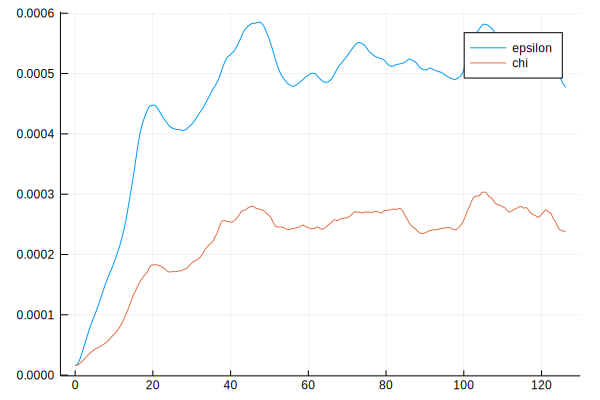

In [4]:
plot(tii,eps_av,label="epsilon", fmt=:svg)
plot!(tii,chi_av,label="chi")
#backend()

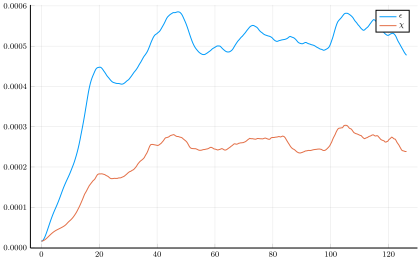

In [9]:
using LaTeXStrings
pgfplots()
plot(tii,eps_av,label=L"\epsilon",fmt=:svg)
plot!(tii,chi_av,label=L"\chi")

In [ ]:
fname="/local/scratch/public/cjh225/v2_peta4/Feb2019/P_force/t8/start.h5"
f = h5open(fname,"r")
(NX,NY,NZ) = size(f["TH1"])
S1=read(f["TH1"])
close(f)

In [ ]:
FFTW.set_num_threads(32)
Sme=mean(S1,dims=(1,3))
S1=S1.-Sme
chi=zeros(NX,NY,NZ)

ft1=plan_rfft(S1,1)
ft2=plan_rfft(S1,2)
ft3=plan_rfft(S1,3)

CS1=ft1 * S1
println(typeof(CS1))
println(size(CS1))
CIKX=im*(0:NX÷2)
CS1=CIKX.*CS1
chi=chi+(inv(ft1) * CS1).^2

println("Computed 1st derivative")

CS1=ft2 * S1
CIKY=reshape(im*(0:NY÷2),(1,NY÷2+1,1))
CS1=CIKY.*CS1
chi=chi+(inv(ft2) * CS1).^2

println("Computed 2nd derivative")

CS1=ft3 * S1
CIKZ=reshape(im*(0:NZ÷2),(1,1,NZ÷2+1))
CS1=CIKZ.*CS1
chi=chi+(inv(ft3) * CS1).^2

println("Computed 3rd derivative")

chi=Ri_t/Re/Pr*chi

CS1=nothing

In [ ]:
A=rand(3,3)
b=0:2
b=reshape(b,(1,length(b)))
C=A.*b
D=A.-2
println(A)
println(size(A))
println(C)
println(D)
println(typeof(1+5÷2*im))

In [ ]:
yvec=2*pi/NY:2*pi/NY:2*pi
Plots.scalefontsizes(1.5)
gr()
heatmap(yvec,yvec,permutedims(log10.(chi[:,:,1]),(2,1)),
    c=:haline, clim=(-7,-2), aspect_ratio=:equal, fmt=:png
)